In [2]:
%load_ext autoreload
%autoreload 2

import pickle
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mD_vT_relationships as relationships
import numpy as np
import relationship_plots as plot
from scipy import stats


In [3]:
plt_params = {
    "axes.labelsize": "xx-large",
    "axes.titlesize": "xx-large",
    "xtick.labelsize": "xx-large",
    "ytick.labelsize": "xx-large",
    "legend.title_fontsize": 10,
    "legend.fontsize": 10,
}
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(plt_params)

In [100]:
"""
variables:
    agg_as = aggregate major radius from fit ellipsoid
    agg_bs = aggregate middle radius from fit ellipsoid
    agg_cs = aggregate minor radius from fit ellipsoid
    Aps = area of projected aggregate polygons in x-y plane
    Acs = area of smallest circle fit around projected aggregate in x-y plane
    Vps = volume of aggregate polygons
    Ves = volume of ellipsoid
    Dmaxs = longest axis from vertex to vertex through 3D polygon
"""
# LOAD IPAS DATA
# array shapes = [mono phi, mono r, nclusters, ncrystals]
f = open("../instance_files/mD_vT_vars_rand", "rb")
result_rand = pickle.load(f)
f.close()

f = open("../instance_files/mD_vT_vars_flat", "rb")
result_flat = pickle.load(f)
f.close()

# LOAD CPI DATA
all_campaigns = ['ARM', 'AIRS_II', 'ATTREX', 'ICE_L', 'IPHEX', 'MACPEX', 'MPACE', 'POSIDON']

campaigns = [] 
classifications = []
ars = []
cnt_area = []
a = []  # larger radius
c = []  # smaller radius
Dmax = []  # max diameter
for campaign in all_campaigns:
    df = pd.read_csv(f'../CPI_verification/{campaign}.csv')
    cnt_area.append(df['cnt_area']*5.29E-12) # [m2]
    ars.append(df['filled_circular_area_ratio'])
    campaigns.append([campaign]*len(df['filled_circular_area_ratio']))
    classifications.append(df['classification'])
    
    for height, width in zip(df['particle height']/2, df['particle width']/2):
        a.append(height* 1E-6 if height > width else width* 1E-6)
        c.append(height* 1E-6 if height < width else width* 1E-6)  # [m]
        Dmax.append(height*2* 1E-6 if height > width else width*2* 1E-6)
#flatten list of lists from each campaign
ars = list(np.concatenate(ars).flat)
cnt_area = list(np.concatenate(cnt_area).flat)
campaigns = list(np.concatenate(campaigns).flat)
classifications = list(np.concatenate(classifications).flat)

df_CPI = pd.DataFrame(list(zip(campaigns, classifications, ars, cnt_area, a, c, Dmax)), columns=['campaign', 'classification', 'area_ratio', 'cnt_area', 'a', 'c', 'Dmax'])
print(len(df_CPI))
df_CPI = df_CPI[df_CPI['area_ratio'] != -999.0]
df.dropna(inplace=True)
print(len(df_CPI))
df_CPI

187413
187412


,campaign,classification,area_ratio,cnt_area,a,c,Dmax
0,ARM,compact_irreg,0.257,1.449346e-06,0.000070,0.000051,0.000140
1,ARM,compact_irreg,0.715,1.930067e-06,0.000107,0.000059,0.000215
2,ARM,compact_irreg,0.434,2.007380e-06,0.000066,0.000063,0.000131
3,ARM,compact_irreg,0.530,2.166686e-06,0.000060,0.000059,0.000120
4,ARM,compact_irreg,0.705,1.812759e-06,0.000064,0.000059,0.000127
...,...,...,...,...,...,...,...
187408,POSIDON,compact_irreg,0.645,2.065184e-06,0.000100,0.000073,0.000201
187409,POSIDON,compact_irreg,0.475,1.562573e-06,0.000092,0.000050,0.000183
187410,POSIDON,column,0.330,8.640395e-07,0.000054,0.000020,0.000108
187411,POSIDON,compact_irreg,0.616,1.463732e-06,0.000065,0.000040,0.000130


### Mass calculated using area vs. volume: <br>

## AREA:
<p> first determine if oblate or prolate for each formed agg (out of 300) for all nm (99):<\p><br>
$rho_i = rho_b * Ar$<br>
oblate:<br>
$m = 4/3 * pi * a^2 * c * rho_i$<br>
prolate:<br>
$m = 4/3 * pi * a * c^2 * rho_i$

## VOLUME:
for a given r_m and phi_m:<br>
$rho_i = rho_b*Vr$<br>
no need to find prolate/oblate <br>
$m = 4/3 * pi * a * b * c *rho_i$   [kg] <br>

<p> only finding mode of m after calculating rho_i for each n and nm </p>
<p> converting Aps, Acs, Vps, ,and Ves into [m]</p>
    

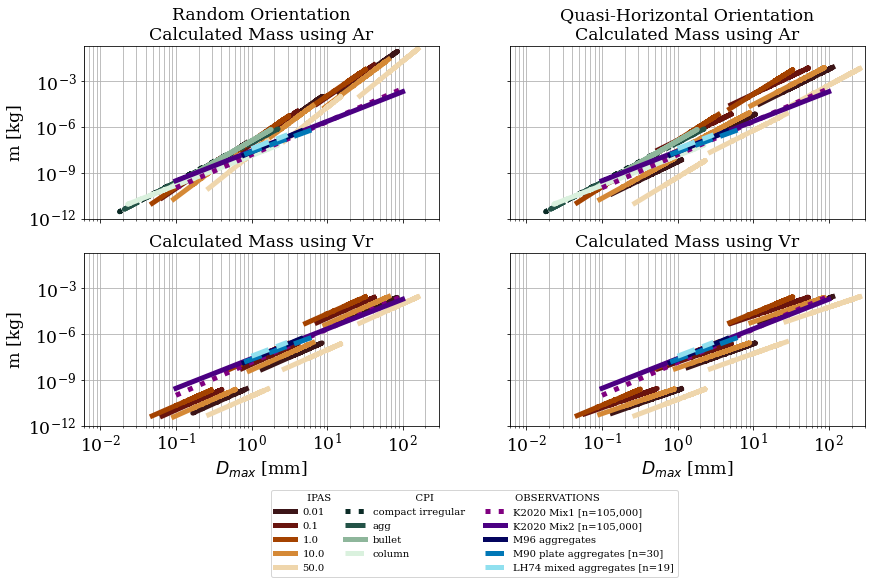

In [43]:
# RANDOM ORIENTATION
# convert dict keys to variables
locals().update(result_rand)

phi_idxs = [0, 1, 2, 3, 4]
r_idxs = [0, 1, 2]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,7), sharey=True, sharex=True)

# RANDOM ORIENTATION
p = plot.Plots(ax1, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
ylabel='m [kg]'
title='Random Orientation\nCalculated Mass using Ar'
p.m_D_plot(title, ylabel, mflag = 'area', result_rand=True)

# QUASI-HORIZONTAL ORIENTATION
locals().update(result_flat)
p = plot.Plots(ax2, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
ylabel=''
title='Quasi-Horizontal Orientation\nCalculated Mass using Ar'
p.m_D_plot(title, ylabel, mflag = 'area', result_rand=False)

# RANDOM ORIENTATION
locals().update(result_rand)
p = plot.Plots(ax3, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
ylabel='m [kg]'
title='\nCalculated Mass using Vr'
p.m_D_plot(title, ylabel,  mflag = 'vol', result_rand=True)

# QUASI-HORIZONTAL ORIENTATION
locals().update(result_flat)
p = plot.Plots(ax4, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
ylabel=''
title='\nCalculated Mass using Vr'
p.m_D_plot(title, ylabel, mflag = 'vol', result_rand=False)
plt.savefig('../plots/m_D_relationship.png', bbox_inches='tight')

USING MITCHELL'S METHOD


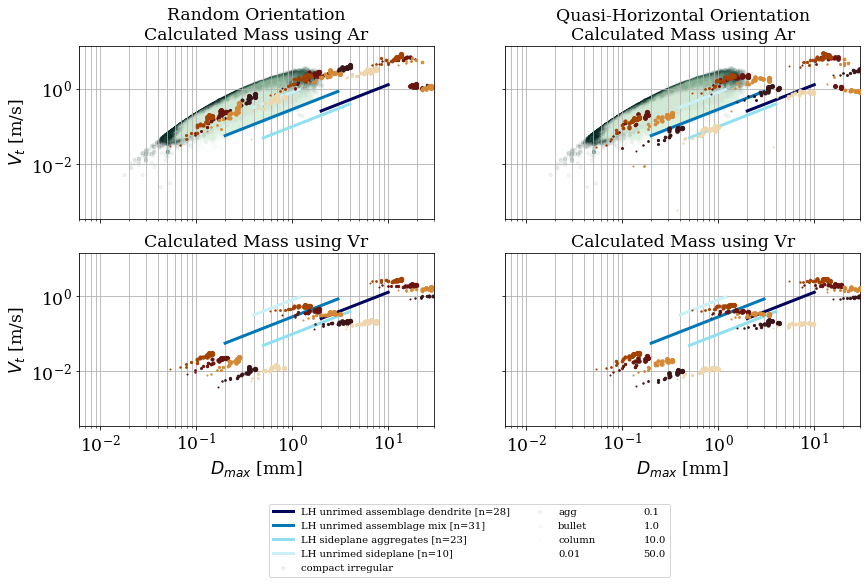

In [207]:
phi_idxs = [0, 1, 2, 3, 4]
r_idxs = [0, 1, 2]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,7), sharey=True, sharex=True)

# RANDOM ORIENTATION
locals().update(result_rand)
p = plot.Plots(ax1, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
ylabel = "$V_t$ [m/s]"
title='Random Orientation\nCalculated Mass using Ar'
p.vt_plot(title, ylabel, mflag = 'area', result_rand=True)

# QUASI-HORIZONTAL ORIENTATION
locals().update(result_flat)
p = plot.Plots(ax2, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
title = f"Quasi-Horizontal Orientation\nCalculated Mass using Ar"
ylabel = " "
p.vt_plot(title, ylabel, mflag = 'area', result_rand=False)

# RANDOM ORIENTATION
locals().update(result_rand)
p = plot.Plots(ax3, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
ylabel = "$V_t$ [m/s]"
title='\nCalculated Mass using Vr'
p.vt_plot(title, ylabel,  mflag = 'vol', result_rand=True)

# QUASI-HORIZONTAL ORIENTATION
locals().update(result_flat)
p = plot.Plots(ax4, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
ylabel = " "
title='\nCalculated Mass using Vr'
p.vt_plot(title, ylabel, mflag = 'vol', result_rand=False)
#plt.savefig('../plots/vt.png', bbox_inches='tight')

print("USING MITCHELL'S METHOD")

USING HEYMSFIELD'S METHOD


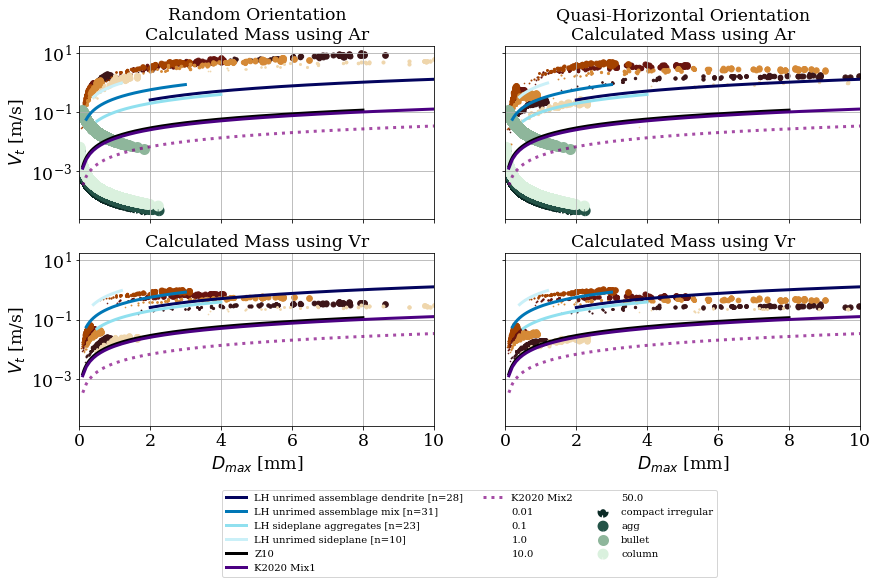

In [140]:
phi_idxs = [0, 1, 2, 3, 4]
r_idxs = [0, 1]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,7), sharey=True, sharex=True)

# RANDOM ORIENTATION
locals().update(result_rand)
p = plot.Plots(ax1, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
ylabel = "$V_t$ [m/s]"
title='Random Orientation\nCalculated Mass using Ar'
p.vt_plot(title, ylabel, mflag = 'area', result_rand=True)

# QUASI-HORIZONTAL ORIENTATION
locals().update(result_flat)
p = plot.Plots(ax2, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
title = f"Quasi-Horizontal Orientation\nCalculated Mass using Ar"
ylabel = " "
p.vt_plot(title, ylabel, mflag = 'area', result_rand=False)

# RANDOM ORIENTATION
locals().update(result_rand)
p = plot.Plots(ax3, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
ylabel = "$V_t$ [m/s]"
title='\nCalculated Mass using Vr'
p.vt_plot(title, ylabel,  mflag = 'vol', result_rand=True)

# QUASI-HORIZONTAL ORIENTATION
locals().update(result_flat)
p = plot.Plots(ax4, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
ylabel = " "
title='\nCalculated Mass using Vr'
p.vt_plot(title, ylabel, mflag = 'vol', result_rand=False)
#plt.savefig('../plots/vt.png', bbox_inches='tight')

print("USING HEYMSFIELD'S METHOD")

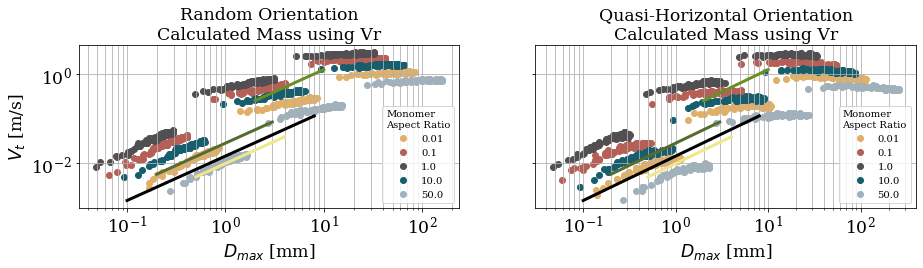

In [16]:
# convert dict keys to variables
locals().update(result_rand)

phi_idxs = [0, 1, 2, 3, 4]
r_idxs = [0, 1, 2]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3), sharey=True)

p = plot.Plots(ax1, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
title = f"Random Orientation\nCalculated Mass using Vr"
ylabel = "$V_t$ [m/s]"
p.vt_plot(title, ylabel)

locals().update(result_flat)
p = plot.Plots(ax2, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
title = f"Quasi-Horizontal Orientation\nCalculated Mass using Vr"
ylabel = " "
p.vt_plot(title, ylabel)

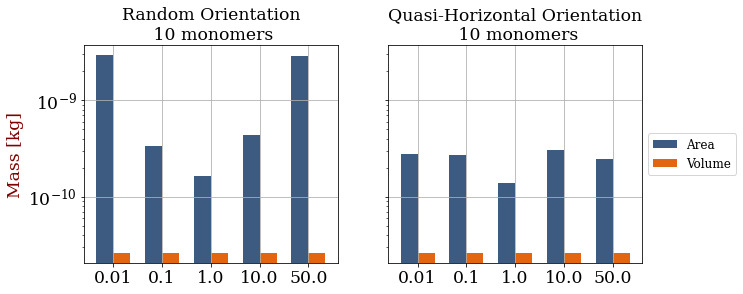

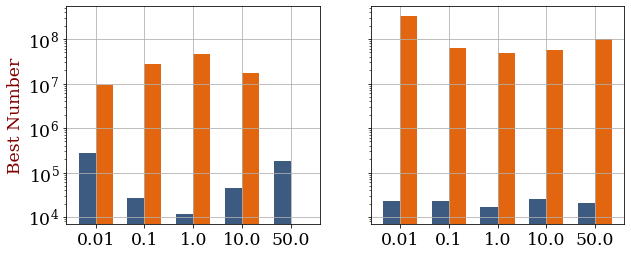

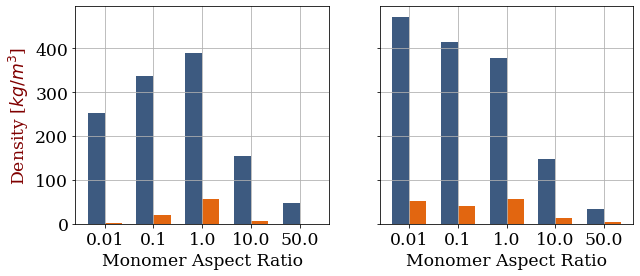

In [152]:
# random ORIENTATION
# convert dict keys to variables
locals().update(result_rand)

phi_idxs = [0, 1, 2, 3, 4]
r_idx = 0
nm = 9  # plot after how many monomers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

p = plot.Plots(ax1, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = r_idx  # index of monomer radius
p.nm = nm  # plot after how many monomers
title = f"Random Orientation\n {nm+1} monomers"
# xlabel = "Monomer Aspect Ratio"
xlabel = ""
p.mass_plot(title, xlabel)

# QH ORIENTATION
# convert dict keys to variables
locals().update(result_flat)
p = plot.Plots(ax2, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
title = f"Quasi-Horizontal Orientation\n {nm+1} monomers"
p.r_idx = r_idx  # index of monomer radius
p.nm = nm  # plot after how many monomers
xlabel = ""
p.mass_plot(title, xlabel)
ax2.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

# convert dict keys to variables
locals().update(result_rand)
phi_idxs = [0, 1, 2, 3, 4]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
p = plot.Plots(ax1, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = r_idx  # index of monomer radius
p.nm = nm  # plot after how many monomers
# title = f"Random Orientation\n {nm+1} monomers"
title = ""
xlabel = ""
p.best_number_plot(title, xlabel)

locals().update(result_flat)
# title = f"Quasi-Horizontal Orientation\n {nm+1} monomers"
title = ""
xlabel = ""
p = plot.Plots(ax2, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = r_idx  # index of monomer radius
p.nm = nm  # plot after how many monomers
p.best_number_plot(title, xlabel)
# ax2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

# convert dict keys to variables
locals().update(result_rand)
phi_idxs = [0, 1, 2, 3, 4]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
p = plot.Plots(ax1, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = r_idx  # index of monomer radius
p.nm = nm  # plot after how many monomers
# title = f"Random Orientation\n {nm+1} monomers"
title = ""
xlabel = "Monomer Aspect Ratio"
p.density_plot(title, xlabel)

locals().update(result_flat)
# title = f"Quasi-Horizontal Orientation\n {nm+1} monomers"
title = ""
xlabel = "Monomer Aspect Ratio"
p = plot.Plots(ax2, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = r_idx  # index of monomer radius
p.nm = nm  # plot after how many monomers
p.density_plot(title, xlabel)
# ax2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

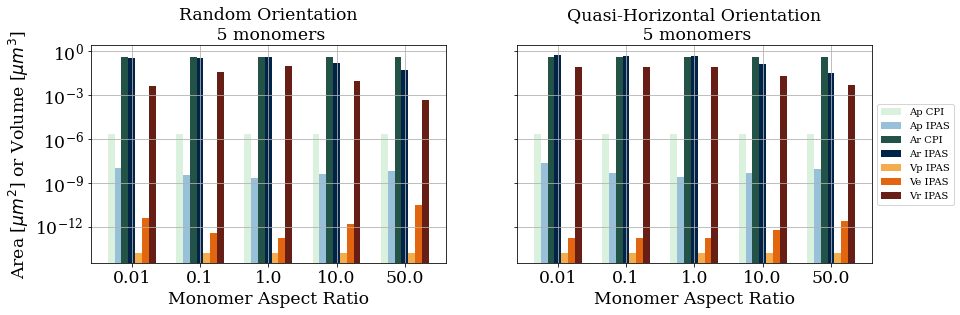

In [122]:
# convert dict keys to variables
locals().update(result_rand)

phi_idxs = [0, 1, 2, 3, 4]
nm = 4  # plot after how many monomers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4), sharey=True)
p = plot.Plots(ax1, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = 0  # index of monomer radius
p.nm = nm  # plot after how many monomers
title = f"Random Orientation\n {nm+1} monomers"
xlabel = "Monomer Aspect Ratio"
p.area_plot(title, xlabel, nm)

locals().update(result_flat)
title = f"Quasi-Horizontal Orientation\n {nm+1} monomers"
xlabel = "Monomer Aspect Ratio"
p = plot.Plots(ax2, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = 0  # index of monomer radius
p.nm = nm  # plot after how many monomers
p.area_plot(title, xlabel, nm)
ax2.legend(loc="center left", bbox_to_anchor=(1.0, 0.5));